In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.linalg import eigvals

In [ ]:
# # define a function that computes all the principal minors of a matrix
# def principal_minors(matrix):
#     n = matrix.shape[0]
#     minors = []
#     for k in range(1, n+1):
#         for i in range(n-k+1):
#             j = i + k - 1
#             submatrix = matrix[i:j+1, i:j+1]
#             minor = np.linalg.det(submatrix)
#             minors.append(minor)
#     return minors


# # define a function that check is all the principal minors are positive
# def is_p(A):
#     return all(np.array(principal_minors(A)) > 0)



# Generating matrices with control over their eigenvalues

In [14]:
# generating n random eigenvalues bigger than m and less than l and putting them in a list
def generate_eigenvalues(n, m, l):
    eigenvalues = []
    for i in range(n):
        eigenvalues.append(np.random.uniform(m, l))
    return eigenvalues

# creating a diagonal matrix with the eigenvalues
def create_diagonal_matrix(eigenvalues):
    n = len(eigenvalues)
    diagonal_matrix = np.zeros((n, n))
    for i in range(n):
        diagonal_matrix[i, i] = eigenvalues[i]
    return diagonal_matrix

# generating a random matrix with size n
def generate_random_matrix(n):
    random_matrix = np.random.rand(n, n)
    return random_matrix

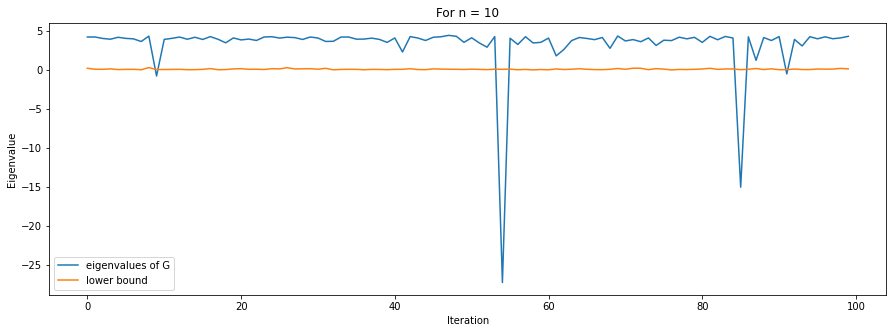

In [33]:
from numpy.linalg import inv
# TESTS:
n = 10
sum_list = []
min_G = []
for i in range(100):
    eigs_1 = generate_eigenvalues(n, 1.5, 2) # all the eigenvalues are bigger than 1.5 (lambda 1)
    eigs_2 = generate_eigenvalues(n, 0.5, 1) # all the eigenvalues are less than 1 (lambda 2)
    sum_list.append(min(eigs_1) + min(eigs_2) - 2) # sum of the smallest eigenvalues of G11 and G22 minus 2

    # creatin G11 and G22
    D_1 = create_diagonal_matrix(eigs_1)
    D_2 = create_diagonal_matrix(eigs_2)

    S_1 = generate_random_matrix(n)
    S_2 = generate_random_matrix(n)

    G_1 = np.dot(np.dot(inv(S_1), D_1), S_1)
    G_2 = np.dot(np.dot(inv(S_2), D_2), S_2)
    G = 2*np.identity(n) + G_1 + G_2 # creating G
    min_G.append(min(eigvals(G)))

# plotting the lower and upper bounds and the eigenvalues of the matrix
plt.figure(figsize=(15,5))
plt.plot(min_G, label='eigenvalues of G')
plt.plot(sum_list, label='lower bound')
plt.xlabel('Iteration')
plt.ylabel('Eigenvalue')
plt.title('Bounds check')
plt.legend()
plt.title('For n = '+str(n))
plt.show()


In [37]:
# Since I couldn't generate the matrix with desired diagonal elements and desired eigenvalues at the same time, I try a different approach.
# define a function to create random adjacency matrix of a weighted directed graph with n nodes and weights between -10 and 10 with weights less than a threshold set to 0 and diagonal elements zero
def create_adj_matrix(n, threshold):
    # create a random adjacency matrix
    adj_matrix = np.random.rand(n, n) * 20 - 10
    # set the diagonal elements to zero
    np.fill_diagonal(adj_matrix, 0)
    # set the weights less than threshold to zero
    adj_matrix[abs(adj_matrix) < threshold] = 0
    # return the adjacency matrix
    return adj_matrix

# define a function to compute the maximum and minimum eigenvalues of the matrix
def compute_eigenvalues(adj_matrix):
    # compute the maximum eigenvalue of the adjacency matrix
    max_eig = np.max(np.linalg.eigvals(adj_matrix))
    # compute the minimum eigenvalue of the adjacency matrix
    min_eig = np.min(np.linalg.eigvals(adj_matrix))
    # return the maximum and minimum eigenvalues
    return max_eig, min_eig

In [38]:
# create a symmetric matrix with 2 as diagonal elements and minimum eigenvalue larger than 1
def create_symmetric_matrix(n):
    # create a random adjacency matrix
    adj_matrix = create_adj_matrix(n, 2)
    # create a symmetric matrix
    symmetric_matrix = adj_matrix + adj_matrix.T
    # set the diagonal elements to 2
    np.fill_diagonal(symmetric_matrix, 2)
    # compute the maximum and minimum eigenvalues of the matrix
    max_eig, min_eig = compute_eigenvalues(symmetric_matrix)
    # check if the minimum eigenvalue is larger than 1
    while min_eig < 1:
        # create a random adjacency matrix
        adj_matrix = create_adj_matrix(n, 2)
        # create a symmetric matrix
        symmetric_matrix = adj_matrix + adj_matrix.T
        # set the diagonal elements to 2
        np.fill_diagonal(symmetric_matrix, 2)
        # compute the maximum and minimum eigenvalues of the matrix
        max_eig, min_eig = compute_eigenvalues(symmetric_matrix)
    # return the symmetric matrix
    return symmetric_matrix

IG_11 = create_symmetric_matrix(10)

KeyboardInterrupt: 